In [1]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

vggish/embedding:0
vggish/embedding:0
Using cuda device


In [2]:
labels=["Speech","Music","Car","Siren","Vehicle","Animal"]
mymodel=trainer(_print=False,_lr=0.01,_labels=labels,
                _classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.5),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )


vggish/embedding:0


In [3]:
dataloader_dict=get_dataloader_dict(labels,datatype="train_print_test",num_data=177)

C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\177_train177AnimalCarMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\train177AnimalCarMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\train300AnimalCarDogMusicSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\gi

Epoch 1/50
epoch_loss:1.7921491480448593
epoch_corrects:849.0,epochsize:5308
train Loss: 1.792149 Acc: 0.159947
epoch_loss:1.7921394033512534
epoch_corrects:634.0,epochsize:4145
valid Loss: 1.792139 Acc: 0.152955
Epoch 2/50
epoch_loss:1.7915894740402205
epoch_corrects:880.0,epochsize:5308
train Loss: 1.791589 Acc: 0.165787
epoch_loss:1.7916610683836898
epoch_corrects:689.0,epochsize:4145
valid Loss: 1.791661 Acc: 0.166224
Epoch 3/50
epoch_loss:1.7910201485748118
epoch_corrects:959.0,epochsize:5308
train Loss: 1.791020 Acc: 0.180671
epoch_loss:1.7911859466025855
epoch_corrects:743.0,epochsize:4145
valid Loss: 1.791186 Acc: 0.179252
Epoch 4/50
epoch_loss:1.7907290070148545
epoch_corrects:965.0,epochsize:5308
train Loss: 1.790729 Acc: 0.181801
epoch_loss:1.790707498896683
epoch_corrects:783.0,epochsize:4145
valid Loss: 1.790707 Acc: 0.188902
Epoch 5/50
epoch_loss:1.7900897744641595
epoch_corrects:1026.0,epochsize:5308
train Loss: 1.790090 Acc: 0.193293
epoch_loss:1.7902288646836044
epoch_

epoch_loss:1.775035808256078
epoch_corrects:1367.0,epochsize:4145
valid Loss: 1.775036 Acc: 0.329795
Epoch 40/50
epoch_loss:1.775289361379878
epoch_corrects:1726.0,epochsize:5308
train Loss: 1.775289 Acc: 0.325170
epoch_loss:1.7746238149118365
epoch_corrects:1389.0,epochsize:4145
valid Loss: 1.774624 Acc: 0.335103
Epoch 41/50
epoch_loss:1.7751746774168955
epoch_corrects:1759.0,epochsize:5308
train Loss: 1.775175 Acc: 0.331387
epoch_loss:1.7742209995324993
epoch_corrects:1407.0,epochsize:4145
valid Loss: 1.774221 Acc: 0.339445
Epoch 42/50
epoch_loss:1.7746812084517087
epoch_corrects:1770.0,epochsize:5308
train Loss: 1.774681 Acc: 0.333459
epoch_loss:1.773816976961382
epoch_corrects:1420.0,epochsize:4145
valid Loss: 1.773817 Acc: 0.342581
Epoch 43/50
epoch_loss:1.7740260629880311
epoch_corrects:1795.0,epochsize:5308
train Loss: 1.774026 Acc: 0.338169
epoch_loss:1.773412513359033
epoch_corrects:1429.0,epochsize:4145
valid Loss: 1.773413 Acc: 0.344753
Epoch 44/50
epoch_loss:1.7740285251494

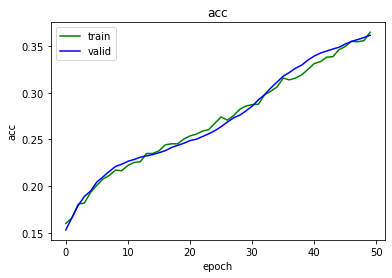

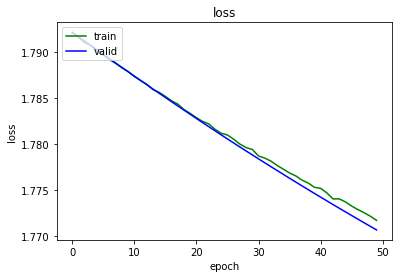

In [4]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
#mymodel.loadModel(addname="1_177datas")
mymodel.graph()
mymodel.saveModel(addname="1_177datas")

In [5]:
mymodel.eval(dataloader_dict)
mymodel.getKondou()


正解数/入力数:1499/4145
正解率:0.362
         Speech  Music    Car  Siren  Vehicle  Animal
Speech      0.0  238.0  168.0  259.0      0.0     0.0
Music       0.0  488.0   87.0  130.0      0.0     0.0
Car         0.0   13.0  458.0  234.0      0.0     0.0
Siren       0.0   42.0   65.0  553.0      0.0     0.0
Vehicle     0.0   27.0  368.0  310.0      0.0     0.0
Animal      0.0  103.0  151.0  451.0      0.0     0.0


Epoch 1/50
epoch_loss:1.7713635226524944
epoch_corrects:1942.0,epochsize:5308
train Loss: 1.771364 Acc: 0.365863
epoch_loss:1.7702701796380975
epoch_corrects:1502.0,epochsize:4145
valid Loss: 1.770270 Acc: 0.362364
Epoch 2/50
epoch_loss:1.7711414410462483
epoch_corrects:1947.0,epochsize:5308
train Loss: 1.771141 Acc: 0.366805
epoch_loss:1.7698877051886086
epoch_corrects:1509.0,epochsize:4145
valid Loss: 1.769888 Acc: 0.364053
Epoch 3/50
epoch_loss:1.7710604200528453
epoch_corrects:1944.0,epochsize:5308
train Loss: 1.771060 Acc: 0.366240
epoch_loss:1.7695078027262763
epoch_corrects:1513.0,epochsize:4145
valid Loss: 1.769508 Acc: 0.365018
Epoch 4/50
epoch_loss:1.770750910066175
epoch_corrects:1967.0,epochsize:5308
train Loss: 1.770751 Acc: 0.370573
epoch_loss:1.769132257226868
epoch_corrects:1513.0,epochsize:4145
valid Loss: 1.769132 Acc: 0.365018
Epoch 5/50
epoch_loss:1.7702512846643437
epoch_corrects:1967.0,epochsize:5308
train Loss: 1.770251 Acc: 0.370573
epoch_loss:1.768755451330086


epoch_loss:1.7571491208668928
epoch_corrects:1594.0,epochsize:4145
valid Loss: 1.757149 Acc: 0.384560
Epoch 40/50
epoch_loss:1.7603878736855307
epoch_corrects:2106.0,epochsize:5308
train Loss: 1.760388 Acc: 0.396760
epoch_loss:1.7568402263022447
epoch_corrects:1591.0,epochsize:4145
valid Loss: 1.756840 Acc: 0.383836
Epoch 41/50
epoch_loss:1.7603372409097575
epoch_corrects:2095.0,epochsize:5308
train Loss: 1.760337 Acc: 0.394687
epoch_loss:1.756536781715973
epoch_corrects:1593.0,epochsize:4145
valid Loss: 1.756537 Acc: 0.384318
Epoch 42/50
epoch_loss:1.7598491956528273
epoch_corrects:2114.0,epochsize:5308
train Loss: 1.759849 Acc: 0.398267
epoch_loss:1.7562318925259341
epoch_corrects:1595.0,epochsize:4145
valid Loss: 1.756232 Acc: 0.384801
Epoch 43/50
epoch_loss:1.7596831615023265
epoch_corrects:2131.0,epochsize:5308
train Loss: 1.759683 Acc: 0.401469
epoch_loss:1.7559282880352836
epoch_corrects:1599.0,epochsize:4145
valid Loss: 1.755928 Acc: 0.385766
Epoch 44/50
epoch_loss:1.7594917249

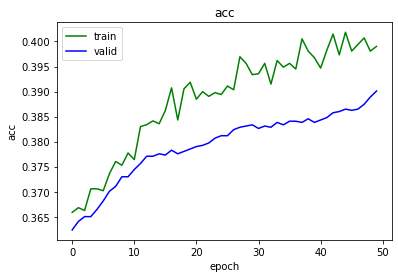

正解数/入力数:1617/4145
正解率:0.390
         Speech  Music    Car  Siren  Vehicle  Animal
Speech      0.0  433.0  130.0   98.0      0.0     4.0
Music       0.0  618.0   41.0   46.0      0.0     0.0
Car         0.0   71.0  463.0  168.0      3.0     0.0
Siren       0.0  100.0   57.0  502.0      0.0     1.0
Vehicle     0.0   69.0  389.0  243.0      4.0     0.0
Animal      0.0  308.0  136.0  231.0      0.0    30.0


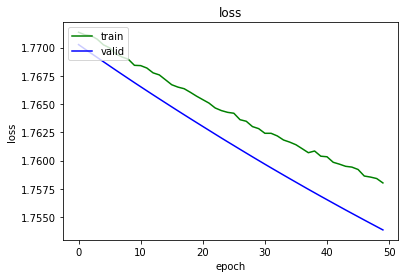

In [6]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
#mymodel.loadModel(addname="1_177datas")
mymodel.graph()
mymodel.saveModel(addname="1_177datas")
mymodel.eval(dataloader_dict)
mymodel.getKondou()


Epoch 1/50
epoch_loss:1.7578207971282533
epoch_corrects:2131.0,epochsize:5308
train Loss: 1.757821 Acc: 0.401469
epoch_loss:1.753570907797543
epoch_corrects:1620.0,epochsize:4145
valid Loss: 1.753571 Acc: 0.390832
Epoch 2/50
epoch_loss:1.7575340671654294
epoch_corrects:2138.0,epochsize:5308
train Loss: 1.757534 Acc: 0.402788
epoch_loss:1.7532823364754782
epoch_corrects:1618.0,epochsize:4145
valid Loss: 1.753282 Acc: 0.390350
Epoch 3/50
epoch_loss:1.7573558001385297
epoch_corrects:2139.0,epochsize:5308
train Loss: 1.757356 Acc: 0.402977
epoch_loss:1.7529955571753268
epoch_corrects:1618.0,epochsize:4145
valid Loss: 1.752996 Acc: 0.390350
Epoch 4/50
epoch_loss:1.7575657093713584
epoch_corrects:2128.0,epochsize:5308
train Loss: 1.757566 Acc: 0.400904
epoch_loss:1.7527136585536998
epoch_corrects:1622.0,epochsize:4145
valid Loss: 1.752714 Acc: 0.391315
Epoch 5/50
epoch_loss:1.7572892230978205
epoch_corrects:2122.0,epochsize:5308
train Loss: 1.757289 Acc: 0.399774
epoch_loss:1.752432812252435

epoch_loss:1.75089752557319
epoch_corrects:2199.0,epochsize:5308
train Loss: 1.750898 Acc: 0.414280
epoch_loss:1.7437373550723343
epoch_corrects:1704.0,epochsize:4145
valid Loss: 1.743737 Acc: 0.411098
Epoch 40/50
epoch_loss:1.7509789069343888
epoch_corrects:2218.0,epochsize:5308
train Loss: 1.750979 Acc: 0.417860
epoch_loss:1.7435073159428356
epoch_corrects:1709.0,epochsize:4145
valid Loss: 1.743507 Acc: 0.412304
Epoch 41/50
epoch_loss:1.7504046174396495
epoch_corrects:2204.0,epochsize:5308
train Loss: 1.750405 Acc: 0.415222
epoch_loss:1.7432751291767392
epoch_corrects:1711.0,epochsize:4145
valid Loss: 1.743275 Acc: 0.412786
Epoch 42/50
epoch_loss:1.7503995572882842
epoch_corrects:2214.0,epochsize:5308
train Loss: 1.750400 Acc: 0.417106
epoch_loss:1.7430460560882624
epoch_corrects:1713.0,epochsize:4145
valid Loss: 1.743046 Acc: 0.413269
Epoch 43/50
epoch_loss:1.7504015890565598
epoch_corrects:2222.0,epochsize:5308
train Loss: 1.750402 Acc: 0.418613
epoch_loss:1.7428170708609145
epoch_

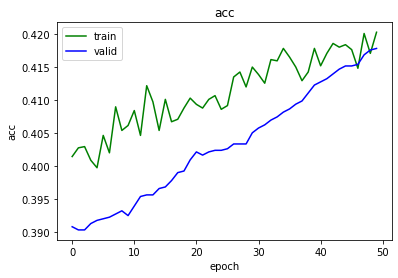

正解数/入力数:1732/4145
正解率:0.418
         Speech  Music    Car  Siren  Vehicle  Animal
Speech      0.0  464.0  114.0   70.0      6.0    11.0
Music       0.0  630.0   37.0   31.0      1.0     6.0
Car         0.0   86.0  467.0  137.0     13.0     2.0
Siren       0.0  117.0   54.0  480.0      3.0     6.0
Vehicle     0.0   84.0  389.0  206.0     22.0     4.0
Animal      0.0  315.0  108.0  147.0      2.0   133.0


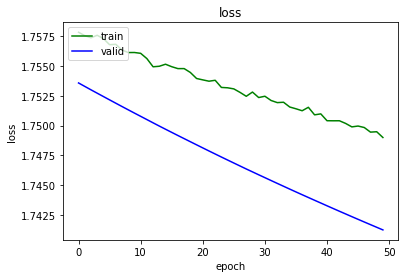

In [7]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
#mymodel.loadModel(addname="1_177datas")
mymodel.graph()
mymodel.saveModel(addname="1_177datas_150")
mymodel.eval(dataloader_dict)
mymodel.getKondou()

Epoch 1/50
epoch_loss:1.749096964792641
epoch_corrects:2220.0,epochsize:5308
train Loss: 1.749097 Acc: 0.418237
epoch_loss:1.7410341100037026
epoch_corrects:1737.0,epochsize:4145
valid Loss: 1.741034 Acc: 0.419059
Epoch 2/50
epoch_loss:1.7492511950225513
epoch_corrects:2243.0,epochsize:5308
train Loss: 1.749251 Acc: 0.422570
epoch_loss:1.7408186136885344
epoch_corrects:1742.0,epochsize:4145
valid Loss: 1.740819 Acc: 0.420265
Epoch 3/50
epoch_loss:1.748669901016339
epoch_corrects:2250.0,epochsize:5308
train Loss: 1.748670 Acc: 0.423888
epoch_loss:1.740601538749023
epoch_corrects:1748.0,epochsize:4145
valid Loss: 1.740602 Acc: 0.421713
Epoch 4/50
epoch_loss:1.7487768220919455
epoch_corrects:2242.0,epochsize:5308
train Loss: 1.748777 Acc: 0.422381
epoch_loss:1.7403862657535494
epoch_corrects:1751.0,epochsize:4145
valid Loss: 1.740386 Acc: 0.422437
Epoch 5/50
epoch_loss:1.748182388203613
epoch_corrects:2262.0,epochsize:5308
train Loss: 1.748182 Acc: 0.426149
epoch_loss:1.7401701778496994
e

epoch_loss:1.7334991200266472
epoch_corrects:1832.0,epochsize:4145
valid Loss: 1.733499 Acc: 0.441978
Epoch 40/50
epoch_loss:1.7440218451603426
epoch_corrects:2302.0,epochsize:5308
train Loss: 1.744022 Acc: 0.433685
epoch_loss:1.733319485144391
epoch_corrects:1834.0,epochsize:4145
valid Loss: 1.733319 Acc: 0.442461
Epoch 41/50
epoch_loss:1.7438856068642048
epoch_corrects:2334.0,epochsize:5308
train Loss: 1.743886 Acc: 0.439714
epoch_loss:1.7331398578834765
epoch_corrects:1838.0,epochsize:4145
valid Loss: 1.733140 Acc: 0.443426
Epoch 42/50
epoch_loss:1.7437008317018148
epoch_corrects:2304.0,epochsize:5308
train Loss: 1.743701 Acc: 0.434062
epoch_loss:1.73296028325296
epoch_corrects:1839.0,epochsize:4145
valid Loss: 1.732960 Acc: 0.443667
Epoch 43/50
epoch_loss:1.7441252970390062
epoch_corrects:2303.0,epochsize:5308
train Loss: 1.744125 Acc: 0.433873
epoch_loss:1.732784069777973
epoch_corrects:1840.0,epochsize:4145
valid Loss: 1.732784 Acc: 0.443908
Epoch 44/50
epoch_loss:1.7437916022543

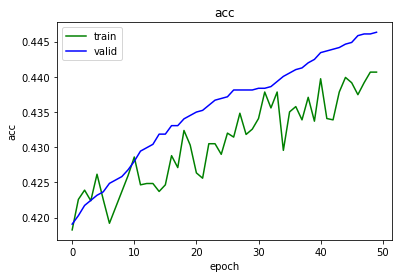

正解数/入力数:1850/4145
正解率:0.446
         Speech  Music    Car  Siren  Vehicle  Animal
Speech      0.0  463.0  107.0   62.0      8.0    25.0
Music       0.0  632.0   37.0   26.0      1.0     9.0
Car         0.0   88.0  466.0  120.0     25.0     6.0
Siren       0.0  116.0   52.0  473.0      7.0    12.0
Vehicle     0.0   88.0  373.0  189.0     43.0    12.0
Animal      0.0  277.0   92.0   98.0      2.0   236.0


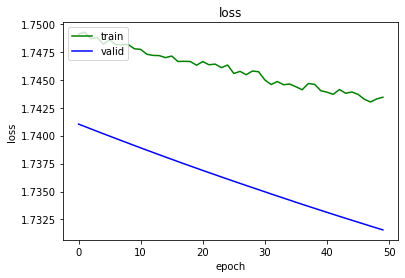

In [8]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
#mymodel.loadModel(addname="1_177datas")
mymodel.graph()
mymodel.saveModel(addname="1_177datas_200")
mymodel.eval(dataloader_dict)
mymodel.getKondou()